# Electricity Price Prediction

### Suppose that your business relies on computing services where the power consumed by your machines varies throughout the day. You do not know the actual cost of the electricity consumed by the machines throughout the day, but the organization has provided you with historical data of the price of the electricity consumed by the machines. Below is the information of the data we have for the task of forecasting electricity prices:



1. DateTime: Date and time of the record.
2. Holiday: contains the name of the holiday if the day is a national holiday
3. HolidayFlag: contains 1 if it’s a bank holiday otherwise 0
4. DayOfWeek: contains values between 0-6 where 0 is Monday
5. WeekOfYear: week of the year
6. Day: Day of the date
7. Month: Month of the date
8. Year: Year of the date
9. PeriodOfDay: half-hour period of the day
10. ForcastWindProduction: forecasted wind production
11. SystemLoadEA forecasted national load
12. SMPEA: forecasted price
13. ORKTemperature: actual temperature measured
14. ORKWindspeed: actual windspeed measured
15. CO2Intensity: actual C02 intensity for the electricity produced
16. ActualWindProduction: actual wind energy production
17. SystemLoadEP2: actual national system load
18. SMPEP2: the actual price of the electricity consumed (labels or values to be predicted)



# Prediction using Python

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/electricity.csv")
print(data.head())

           DateTime Holiday  HolidayFlag  DayOfWeek  WeekOfYear  Day  Month  \
0  01/11/2011 00:00     NaN            0          1          44    1     11   
1  01/11/2011 00:30     NaN            0          1          44    1     11   
2  01/11/2011 01:00     NaN            0          1          44    1     11   
3  01/11/2011 01:30     NaN            0          1          44    1     11   
4  01/11/2011 02:00     NaN            0          1          44    1     11   

   Year  PeriodOfDay ForecastWindProduction SystemLoadEA  SMPEA  \
0  2011            0                 315.31      3388.77  49.26   
1  2011            1                 321.80      3196.66  49.26   
2  2011            2                 328.57      3060.71  49.10   
3  2011            3                 335.60      2945.56  48.04   
4  2011            4                 342.90      2849.34  33.75   

  ORKTemperature ORKWindspeed CO2Intensity ActualWindProduction SystemLoadEP2  \
0           6.00         9.30       600.7

<ipython-input-28-fab44446a969>:3: DtypeWarning: Columns (9,10,11,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/electricity.csv")


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateTime                38014 non-null  object
 1   Holiday                 1536 non-null   object
 2   HolidayFlag             38014 non-null  int64 
 3   DayOfWeek               38014 non-null  int64 
 4   WeekOfYear              38014 non-null  int64 
 5   Day                     38014 non-null  int64 
 6   Month                   38014 non-null  int64 
 7   Year                    38014 non-null  int64 
 8   PeriodOfDay             38014 non-null  int64 
 9   ForecastWindProduction  38014 non-null  object
 10  SystemLoadEA            38014 non-null  object
 11  SMPEA                   38014 non-null  object
 12  ORKTemperature          38014 non-null  object
 13  ORKWindspeed            38014 non-null  object
 14  CO2Intensity            38014 non-null  object
 15  Ac

In [ ]:
data["ForecastWindProduction"] = pd.to_numeric(data["ForecastWindProduction"], errors= 'coerce')
data["SystemLoadEA"] = pd.to_numeric(data["SystemLoadEA"], errors= 'coerce')
data["SMPEA"] = pd.to_numeric(data["SMPEA"], errors= 'coerce')
data["ORKTemperature"] = pd.to_numeric(data["ORKTemperature"], errors= 'coerce')
data["ORKWindspeed"] = pd.to_numeric(data["ORKWindspeed"], errors= 'coerce')
data["CO2Intensity"] = pd.to_numeric(data["CO2Intensity"], errors= 'coerce')
data["ActualWindProduction"] = pd.to_numeric(data["ActualWindProduction"], errors= 'coerce')
data["SystemLoadEP2"] = pd.to_numeric(data["SystemLoadEP2"], errors= 'coerce')
data["SMPEP2"] = pd.to_numeric(data["SMPEP2"], errors= 'coerce')

In [ ]:
data.isnull().sum()

,0
DateTime,0
Holiday,36478
HolidayFlag,0
DayOfWeek,0
WeekOfYear,0
Day,0
Month,0
Year,0
PeriodOfDay,0
ForecastWindProduction,5


In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

,0
DateTime,0
Holiday,0
HolidayFlag,0
DayOfWeek,0
WeekOfYear,0
Day,0
Month,0
Year,0
PeriodOfDay,0
ForecastWindProduction,0


## correlation between all the columns in the dataset

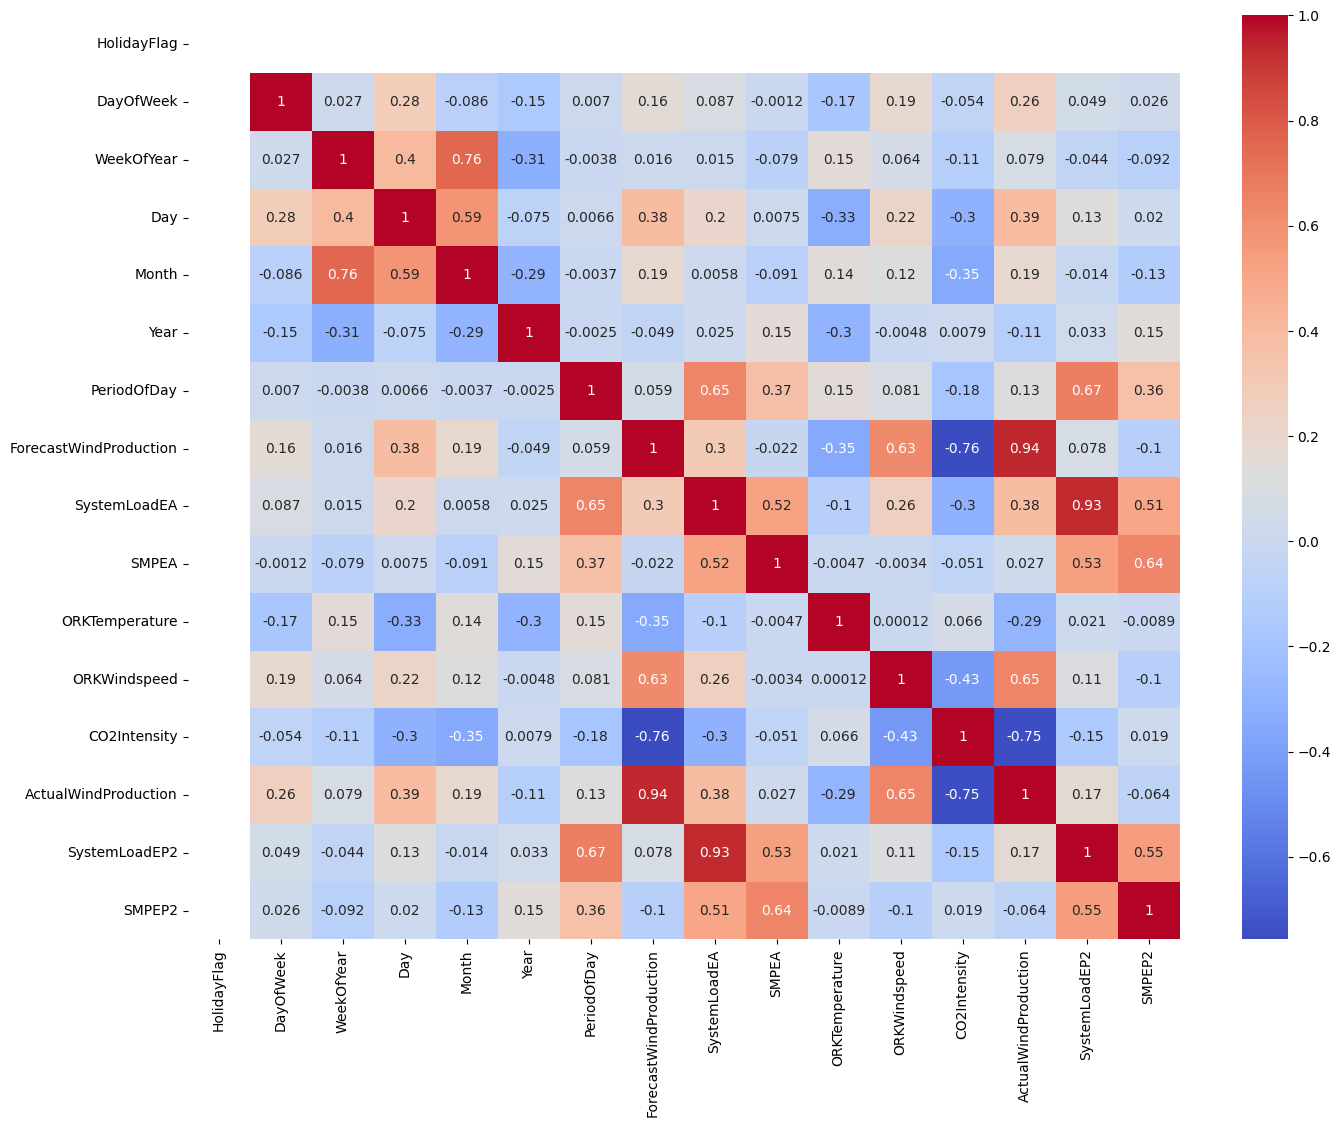

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_data = data.select_dtypes(include=[np.number])
correlations = numeric_data.corr(method='pearson')

plt.figure(figsize=(16, 12))
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

# Electricity Price Prediction Model

In [ ]:
x = data[["Day", "Month", "ForecastWindProduction", "SystemLoadEA",
          "SMPEA", "ORKTemperature", "ORKWindspeed", "CO2Intensity",
          "ActualWindProduction", "SystemLoadEP2"]]
y = data["SMPEP2"]
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                test_size=0.2,
                                                random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(xtrain, ytrain)

RandomForestRegressor()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    bootstrap=True,
    ccp_alpha=0.0,
    criterion='squared_error',  # updated from 'mse'
    max_depth=None,
    max_features='sqrt',  # updated from 'auto'
    max_leaf_nodes=None,
    max_samples=None,
    min_impurity_decrease=0.0,  # keep this as is
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    n_estimators=100,
    n_jobs=None,
    oob_score=False,
    random_state=None,
    verbose=0,
    warm_start=False
)

model.fit(xtrain, ytrain) # Added this line to fit the model to your data

RandomForestRegressor(max_features='sqrt')

In [ ]:
feature_names = ["Day", "Month", "ForecastWindProduction", "SystemLoadEA", "SMPEA",
 "ORKTemperature", "ORKWindspeed", "CO2Intensity", "ActualWindProduction", "SystemLoadEP2"]


# Create a DataFrame with the correct number of features (10 columns)
features_df = pd.DataFrame([[10, 12, 54.10, 4241.05, 49.56, 9.0, 14.8, 491.32, 54.0, 4426.84]], columns=feature_names)

# Make a prediction using the DataFrame
prediction = model.predict(features_df)

# Output the prediction
print("Prediction:", prediction)


Prediction: [95.0591]


# Model Evaluation and Performance Improvement

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on the test set
y_pred = model.predict(xtest)

# Calculate evaluation metrics
mse = mean_squared_error(ytest, y_pred)
mae = mean_absolute_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)


Mean Squared Error: 332.2167114688375
Mean Absolute Error: 8.547416549295772
R² Score: 0.7180220465795824


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(xtrain, ytrain)

print("Best parameters found: ", grid_search.best_params_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found:  {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
importances = model.feature_importances_
feature_names = xtrain.columns

# Sort and display feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)


                  Feature  Importance
4                   SMPEA    0.296867
9           SystemLoadEP2    0.178407
3            SystemLoadEA    0.149312
2  ForecastWindProduction    0.089452
8    ActualWindProduction    0.078861
7            CO2Intensity    0.059492
6            ORKWindspeed    0.048157
0                     Day    0.037418
5          ORKTemperature    0.033213
1                   Month    0.028821


In [ ]:
import joblib
joblib.dump(model, 'electricity_model.pkl')


['electricity_model.pkl']

In [ ]:
# Load the model
loaded_model = joblib.load('electricity_model.pkl')

# Make predictions with the loaded model
prediction = loaded_model.predict(features_df)
print("Prediction:", prediction)


Prediction: [95.0591]
